# **Train CSV**

Data Cleaning

Data cleaning Tasks : Handling missing values. Correcting data entry errors. Standardizing data formats. Encoding categorical variables. Removing duplicates or irrelevant data.

In [170]:
import pandas as pd
train = pd.read_csv('/content/traincsv.csv', low_memory=False)
train.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756,5292,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [172]:
train.isna().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


In [173]:
# change cluster_catgeory to cluster_category
train.rename(columns={'cluster_catgeory': 'cluster_category'}, inplace=True)

In [174]:
#convert the strings to numeric value
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype(float)
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype(float)
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype(float)
train['cluster_category'] = pd.to_numeric(train['cluster_category'], errors='coerce').astype(float)

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774110 non-null  float64
 3   fresh_sales       774105 non-null  float64
 4   dry_sales         774117 non-null  float64
 5   cluster_category  774153 non-null  float64
dtypes: float64(5), object(1)
memory usage: 35.4+ MB


In [176]:
train.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_category
count,7.741530e+05,774110.000000,774105.000000,774117.000000,774153.000000
mean,1.038708e+07,1921.965255,4428.680047,4676.280399,3.292701
std,2.234795e+05,1004.078513,3334.654673,3409.386733,1.881905
min,1.000000e+07,500.000000,500.000000,500.000000,1.000000
25%,1.019354e+07,1213.530000,1620.190000,1787.940000,2.000000
50%,1.038708e+07,1715.280000,3356.480000,3727.760000,3.000000
75%,1.058062e+07,2338.697500,6671.610000,7162.200000,5.000000
max,1.077415e+07,6999.650000,13997.900000,13999.300000,100.000000


Customer ID

In [177]:
missing_percentage = (train['Customer_ID'].isna().sum() / len(train)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 0.00%


In [178]:
# Remove rows with missing values in customerId
train = train.dropna(subset=['Customer_ID'])

Outlets

In [179]:
# missing values for outlet cities
missing_percentage = (train['outlet_city'].isna().sum() / len(train)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 0.00%


In [180]:
#remove missing values
train = train.dropna(subset=['outlet_city'])

Luxury sales

In [181]:
# missing values
missing_percentage = (train['luxury_sales'].isna().sum() / len(train)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 0.01%


In [182]:
#impute luxary sale
train['luxury_sales'] = train['luxury_sales'].fillna(train['luxury_sales'].median())

<ipython-input-182-2073173578>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='luxury_sales', ylabel='Count'>

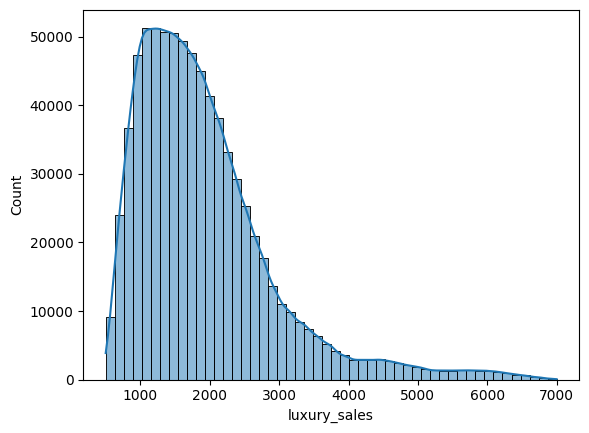

In [183]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['luxury_sales'], bins=50, kde=True)

Since its right skewwed using the median approah.

Fresh Sales

In [184]:
#missing values
missing_percentage = (train['fresh_sales'].isna().sum() / len(train)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 0.01%


In [185]:
train['fresh_sales'] = train['fresh_sales'].fillna(train['fresh_sales'].median())

<Axes: xlabel='fresh_sales', ylabel='Count'>

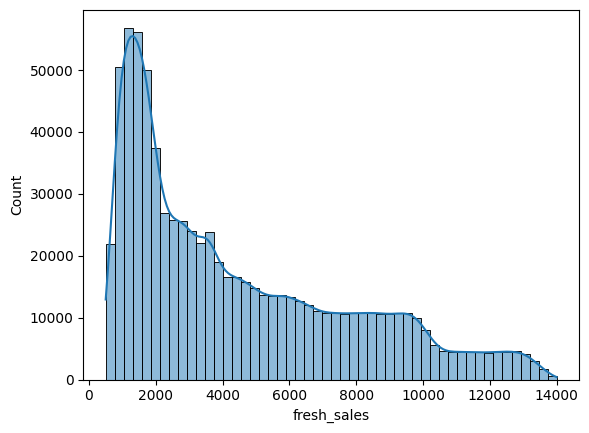

In [186]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['fresh_sales'], bins=50, kde=True)

Dry Sales

In [187]:
#missing values
missing_percentage = (train['dry_sales'].isna().sum() / len(train)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 0.00%


In [188]:
train['dry_sales'] = train['dry_sales'].fillna(train['dry_sales'].median())


<Axes: xlabel='dry_sales', ylabel='Count'>

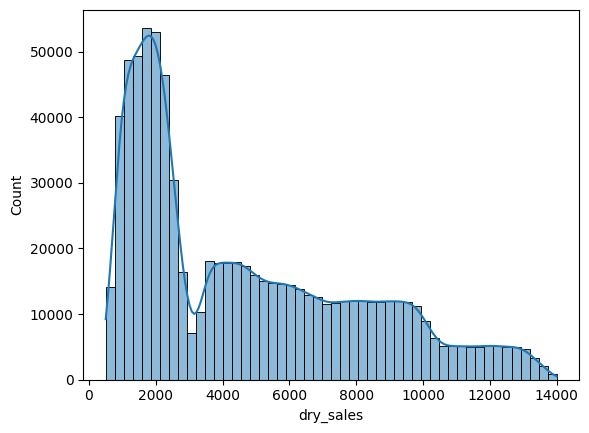

In [189]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['dry_sales'], bins=50, kde=True)

In [190]:
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_category,2


cluster Analysis

In [191]:
# unique values
train['cluster_category'].unique()

array([  4.,   1.,  99.,   2.,   5.,   3.,   6.,  nan,  95.,  98., 100.,
        89.])

In [192]:
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_category,2


In [193]:
# remove the clusters after 6
train = train[train['cluster_category'] <= 6]
train

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0
...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.40,3893.40,3448.44,3.0
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3.0
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3.0
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3.0


In [194]:
# unique values
train['cluster_category'].unique()

array([4., 1., 2., 5., 3., 6.])

**EDA For Cleaned Train Dataset**

In [195]:
import matplotlib.pyplot as plt
import plotly.express as px

In [196]:
#Sales by City
city_sales = train.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig1 = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig1.show()

# **Feature Engineeering**

Feature Scaling

In [197]:
#contigency table for outlet city
contigency_table = pd.crosstab(train['outlet_city'], train['cluster_category'])
contigency_table

cluster_category,1.0,2.0,3.0,4.0,5.0,6.0
outlet_city,,,,,,
Batticaloa,18960,2,4901,0,2,17147
Colombo,19021,0,4959,3,2,17046
Dehiwala-Mount Lavinia,1,15648,0,17283,3902,3
Galle,19034,2,4932,1,3,17037
Gampaha,18763,1,4833,0,1,16654
Homagama,2,15464,0,17220,3951,1
Jaffna,18821,2,4906,3,2,16940
Kaduwela,1,15478,1,17360,3853,2
Kalmunai,18852,3,4831,1,1,17022


In [198]:
# Create contingency table and compute total customers per city
city_totals = pd.crosstab(train['outlet_city'], train['cluster_category']).sum(axis=1)

# Classify cities based on whether their total is above median
area_mapping = (city_totals > city_totals.median()).map({True: 'Urban', False: 'Suburban'}).to_dict()

# Map classification back to the original dataset
train['Area'] = train['outlet_city'].map(area_mapping)

# View updated dataset
train

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,Area
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,Suburban
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0,Suburban
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,Suburban
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,Suburban
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,Suburban
...,...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.40,3893.40,3448.44,3.0,Urban
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3.0,Urban
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3.0,Urban
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3.0,Urban


<ipython-input-199-14385979>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




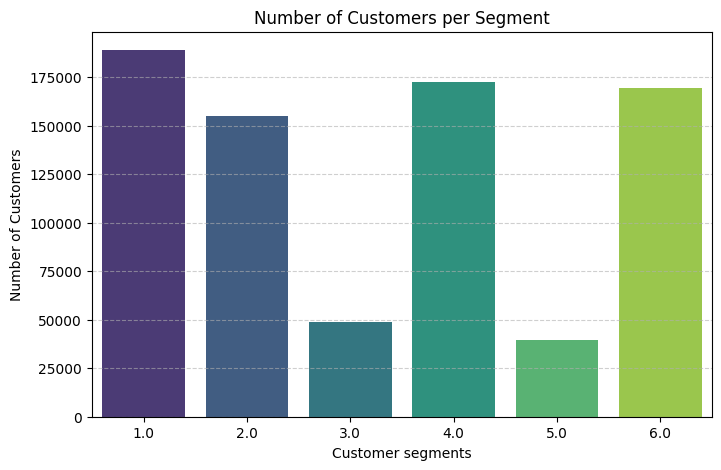

In [199]:
# Count how many customers in each predicted segment
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster_category', data=train, palette='viridis')

plt.title('Number of Customers per Segment')
plt.xlabel('Customer segments')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [200]:
# adding a new column
train['total_sales'] = train['luxury_sales'] + train['fresh_sales'] + train['dry_sales']
train

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,Area,total_sales
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,Suburban,7257.60
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0,Suburban,8657.32
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,Suburban,12925.44
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,Suburban,13114.36
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,Suburban,13659.03
...,...,...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.40,3893.40,3448.44,3.0,Urban,11235.24
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3.0,Urban,17929.00
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3.0,Urban,14611.11
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3.0,Urban,18564.00


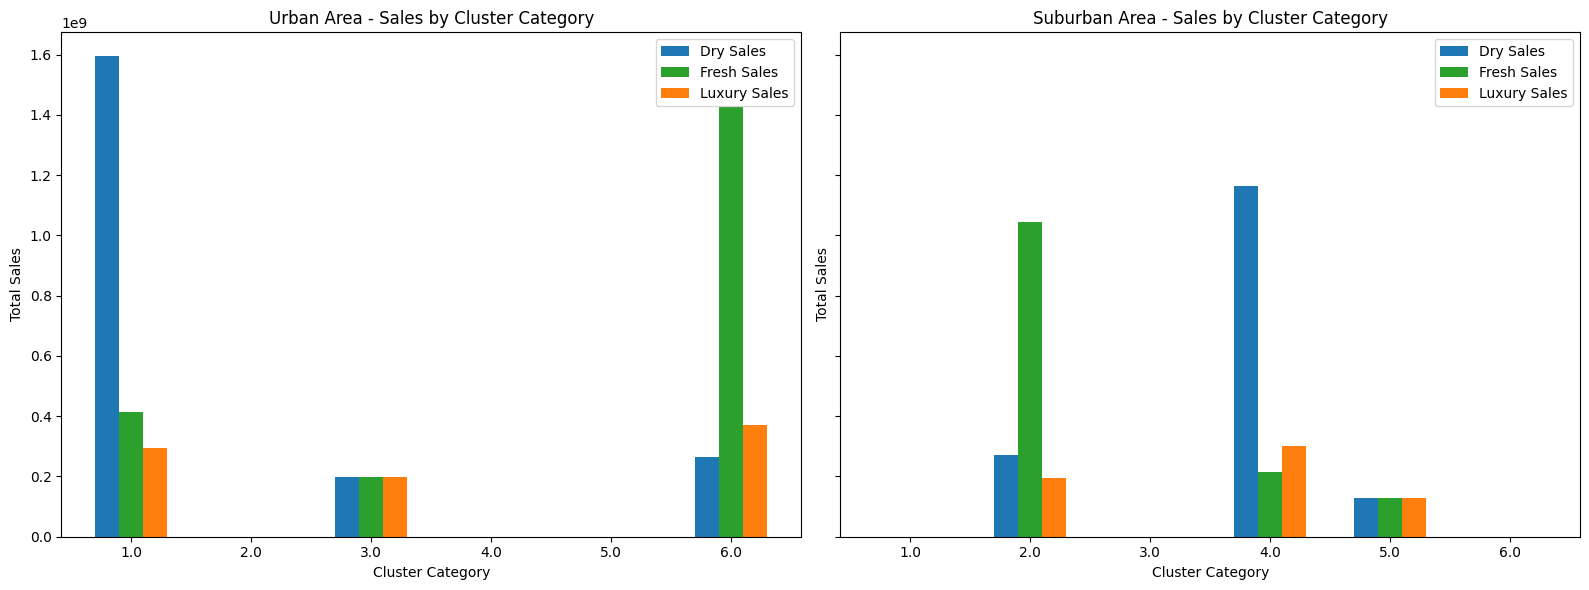

In [201]:
# Group and prepare data
grouped = train.groupby(['Area', 'cluster_category'])[['dry_sales', 'fresh_sales', 'luxury_sales']].sum().reset_index()
sales_types = ['dry_sales', 'fresh_sales', 'luxury_sales']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
bar_width = 0.2

# Loop through Urban and Suburban
for i, area in enumerate(['Urban', 'Suburban']):
    area_data = grouped[grouped['Area'] == area]
    x = np.arange(len(area_data))

    for j, sale_type in enumerate(sales_types):
        axes[i].bar(x + j * bar_width, area_data[sale_type], width=bar_width, label=sale_type.replace('_', ' ').title(), color=colors[j])

    axes[i].set_title(f'{area} Area - Sales by Cluster Category')
    axes[i].set_xlabel('Cluster Category')
    axes[i].set_ylabel('Total Sales')
    axes[i].set_xticks(x + bar_width)
    axes[i].set_xticklabels(area_data['cluster_category'].astype(str))
    axes[i].legend()

plt.tight_layout()
plt.show()

In [202]:
# download cleaned csv
train.to_csv('cleaned_train.csv', index=False)